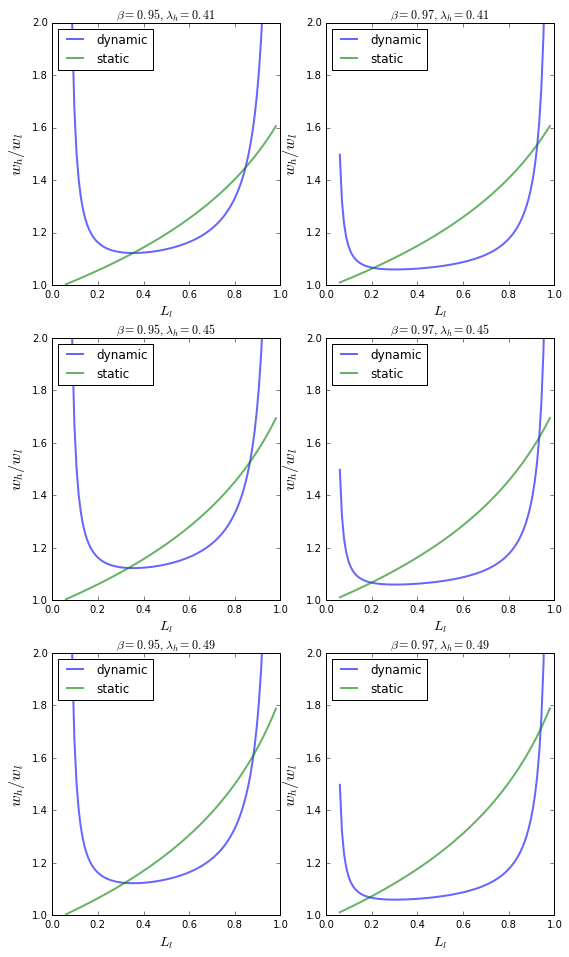

In [59]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

"""
use beta=0.95, 0.97
lambdah=
"""

beta=0.95
lambdah=0.42
def lnwage(low):
    temp1=(1-beta)/((1-low)*beta*(low+beta-1))
    temp2=(low+beta-1)/low
    return np.exp(temp1)*temp2
    
"""
high=1-low
llow=low+beta-1
"""
def stage(low):
    temp1=(low+beta-1)*np.exp(-lambdah)
    temp2=np.sqrt(temp1**2+(1-low)*(1-low+2*(low+beta-1)))
    temp3=(temp1+temp2)/(1-low+2*(low+beta-1))
    return -np.log(temp3)/lambdah

def wage(low):
    return (np.exp(2*lambdah*stage(low))+1)/2

Lambdah=[0.41, 0.45, 0.49]
Beta=[0.95, 0.97]
num_rows, num_cols=3, 2
fig, axes=plt.subplots(num_rows, num_cols, figsize=(9,16))
for i in range(num_rows):
    for j in range(num_cols):
        lambdah=Lambdah[i]
        beta=Beta[j]
        Low=np.linspace(0.06, 0.98, 100)
        W1=[]
        W2=[]
        for low in Low:
            w1=lnwage(low)
            w2=wage(low)
            W1.append(w1)
            W2.append(w2)
        axes[i, j].plot(Low, W1, lw=2, alpha=0.6, label='dynamic')
        axes[i, j].plot(Low, W2, lw=2, alpha=0.6, label='static')
        axes[i, j].legend(loc='upper left')
        t=r'$\beta={}, \lambda_h={}$'.format(beta, lambdah)
        axes[i, j].set_title(t)
        axes[i, j].set_ylim(1, 2)
        axes[i, j].set_xlabel(r'$L_l$', fontsize=14)
        axes[i, j].set_ylabel(r'$w_h/w_l$', fontsize=16)
plt.show()

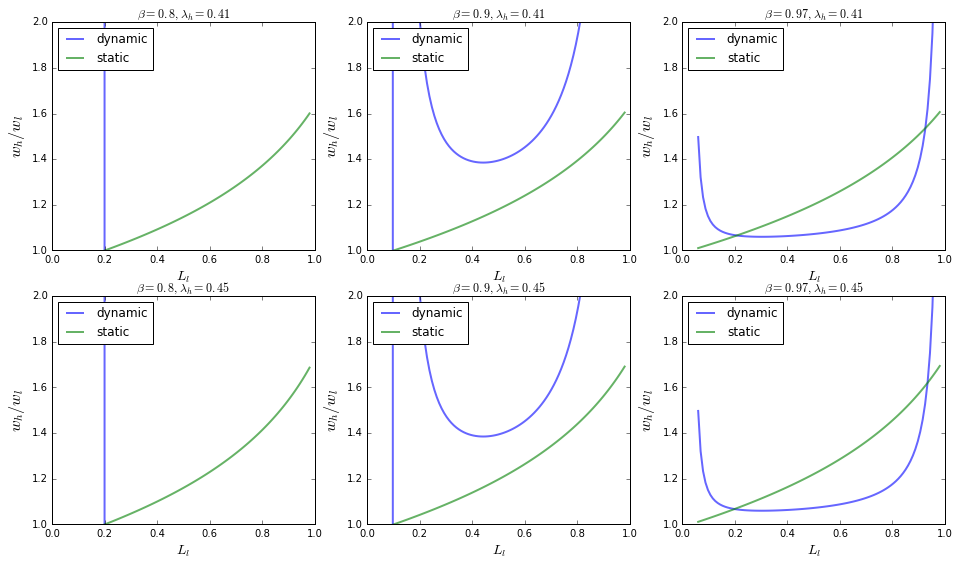

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

"""
use beta=0.95, 0.97
lambdah=
"""

beta=0.95
lambdah=0.42
def lnwage(low):
    temp1=(1-beta)/((1-low)*beta*(low+beta-1))
    temp2=(low+beta-1)/low
    return np.exp(temp1)*temp2
    
"""
high=1-low
llow=low+beta-1
"""
def stage(low):
    temp1=(low+beta-1)*np.exp(-lambdah)
    temp2=np.sqrt(temp1**2+(1-low)*(1-low+2*(low+beta-1)))
    temp3=(temp1+temp2)/(1-low+2*(low+beta-1))
    return -np.log(temp3)/lambdah

def wage(low):
    return (np.exp(2*lambdah*stage(low))+1)/2

Lambdah=[0.41, 0.45]
Beta=[0.80, 0.9, 0.97]
num_rows, num_cols=2, 3
fig, axes=plt.subplots(num_rows, num_cols, figsize=(16,9))
for i in range(num_rows):
    for j in range(num_cols):
        lambdah=Lambdah[i]
        beta=Beta[j]
        Low=np.linspace(0.06, 0.98, 100)
        W1=[]
        W2=[]
        for low in Low:
            w1=lnwage(low)
            w2=wage(low)
            W1.append(w1)
            W2.append(w2)
        axes[i, j].plot(Low, W1, lw=2, alpha=0.6, label='dynamic')
        axes[i, j].plot(Low, W2, lw=2, alpha=0.6, label='static')
        axes[i, j].legend(loc='upper left')
        t=r'$\beta={}, \lambda_h={}$'.format(beta, lambdah)
        axes[i, j].set_title(t)
        axes[i, j].set_ylim(1, 2)
        axes[i, j].set_xlabel(r'$L_l$', fontsize=14)
        axes[i, j].set_ylabel(r'$w_h/w_l$', fontsize=16)
plt.show()